In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy.interpolate as spi

In [171]:
D = 3
N = 1e8
volume_points = 0
volume_radii = 200
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 6) for tnn in true_nlist]

s = 1.0
sclist = [0.1, 0.5, 1.0]
sclist = [1.0]
L = 1.0
res_dir = 'nsc-volume'
randix = 0
n_perms = 10

In [173]:
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
interp_bins = np.geomspace(1e-5, 100, int(1e6))
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        if true_n in [3,6]:
            n_perms = 10
        elif true_n in [12]:
            n_perms = 3
        elif true_n in [1.5, 24]:
            n_perms = 1
        if true_n == 24:
            volume_radii = 50
        else:
            volume_radii = 200
        interp_counts = np.zeros((n_perms, interp_bins.shape[0]))
        for randix in range(0, n_perms):
            fout = (
                f"{res_dir}/D={D}_n={float(n):.5f}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}_"
                f"v={volume_points}_V={volume_radii}"
            )
            res = pd.read_csv(fout+'_civs.csv')
            print(res.shape[0])
            res['VolumeMax'] = pd.concat([res.VolumeRadii, res.VolumePoints], axis=1).max(axis=1)
            res_years = pd.read_csv(fout+'_years.csv')
            tau = res_years.OriginTime.median() # median origin proper-time
            G = 2e6*np.power(13.8*s/c*tau,3)
            C = res.shape[0]
            myData = G / ((np.arange(1,C+1)/C)*C) * res.VolumeRadii 
            T50 = res.OriginTime.median() # median origin model-time
            G = 2e6*pow(13.8/T50, 3)*pow(c/s, 3) / C
            myData = res.VolumeRadii * G
            """
            fig = plt.figure()
            (counts, bins, patches) = plt.hist(
                myData, cumulative=True, histtype='step', 
                density=True, bins=interp_bins)  
            fig.clf()
            interp_f = spi.interp1d(bins[0:-1], counts, bounds_error=False)
            """
            interp_f = spi.interp1d(np.arange(1,C+1)/C, np.sort(myData), bounds_error=False)
            interp_counts[randix,:] = interp_f(interp_bins)           
        plot_data[(true_n, sc)] = np.mean(interp_counts, axis=0)

5831
1707
1707
1748
1722
1780
1719
1737
1709
1629
1856
1709
1709
1804
1705
1850
1692
1758
1709
1633
1914
4623
4623
4815
22264


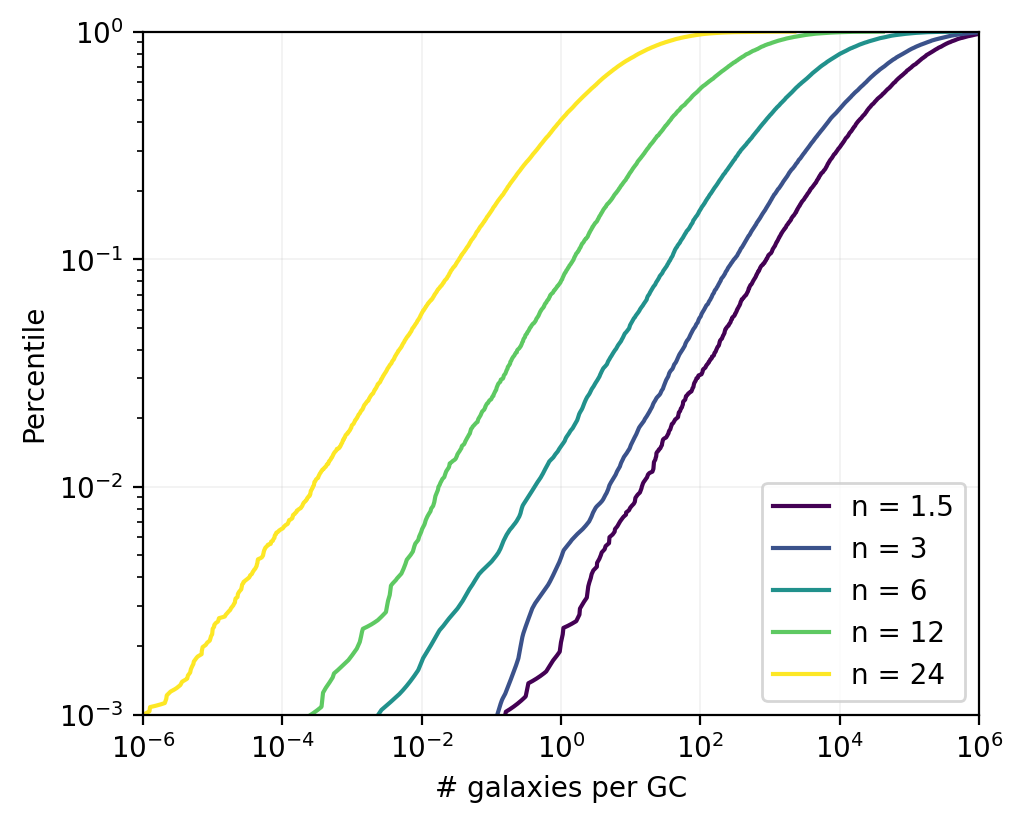

In [176]:
plt.rcParams['figure.constrained_layout.use'] = True
fig = plt.figure(figsize=(5,4),dpi=200)
ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        counts = plot_data[(true_n, sc)]
        #plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        #plt.plot(interp_bins, counts, scstyles[scix], color=mycols[nix])
        plt.plot(counts, interp_bins, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}")
#ax.set_position([0.1,0.15,0.5,0.75])
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('# galaxies per GC');
#plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
#plt.gca().set_xticks([1, 10, 100, 1000]);
#plt.gca().set_xticklabels(['0', '9', '99', '999']);
#plt.gca().set_xticks([1, 2, 11, 101, 1001]);
#plt.gca().set_xticklabels([0, 1, 10, 100, 1000]);
#plt.gca().set_xticks([1, 2, 10, 11]);#, 1e+1, 11,  1e+2, 101, 1e+3, 1001]);
#plt.gca().set_xticks([1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]);
#plt.gca().set_xticks([1, 2, 10, 100, 1000]);
#plt.gca().set_xticklabels([0, '1', 10, 100, 1000]);
#plt.gca().set_xlim(1, 3000)
#plt.legend(leg, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.legend(leg, loc='lower right');
plt.grid(linewidth=0.1);
plt.gca().set_ylim(0.001, 1.0)
plt.gca().set_xlim(1e-6, 1e+6)
#plt.gca().set_xlim(1e-5, 1e-2);
#plt.gca().set_yticks([0.001, 0.01, 0.1, 0.2, 0.5, 1.0]);
#plt.gca().set_yticklabels([0.001, 0.01, 0.1, 0.2, 0.5, 1.0]);
fig.savefig(f'figures-friday/plotVolume.png', dpi=200);